In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pprint

In [19]:
#Download the digits dataset
digits = datasets.load_digits()
pprint.pp(digits.images.shape)
pprint.pp(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [20]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

## Part 0

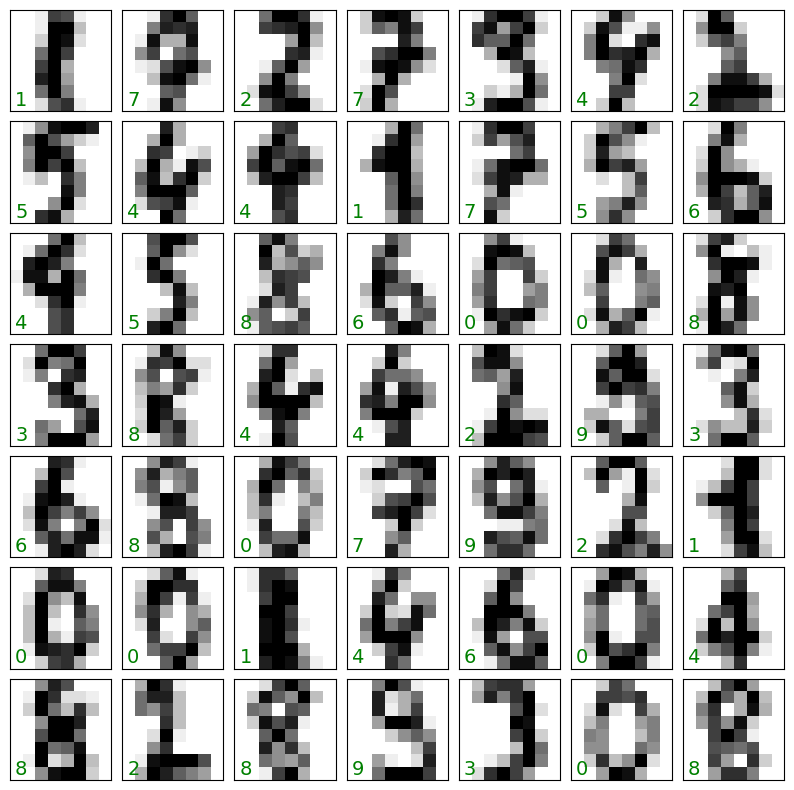

In [21]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [22]:
pprint.pp(digits.data.shape)

#The images themselves
pprint.pp(digits.images[0])

#The data for use in our algorithms
pprint.pp(digits.data[0])

#The labels
pprint.pp(digits.target)
pprint.pp(digits.target[0])

(1797, 64)
array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])
array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])
array([0, 1, 2, ..., 8, 9, 8])
0


## Part 1: Unsupervised learning

In [23]:
isomap = Isomap(n_neighbors=8, n_components=2) #n-components states the final dimension after the reduction

In [24]:
X, y = digits.data, digits.target
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_transformed = isomap.fit_transform(X_standardized)

In [25]:
np.shape(X_transformed)

(1797, 2)

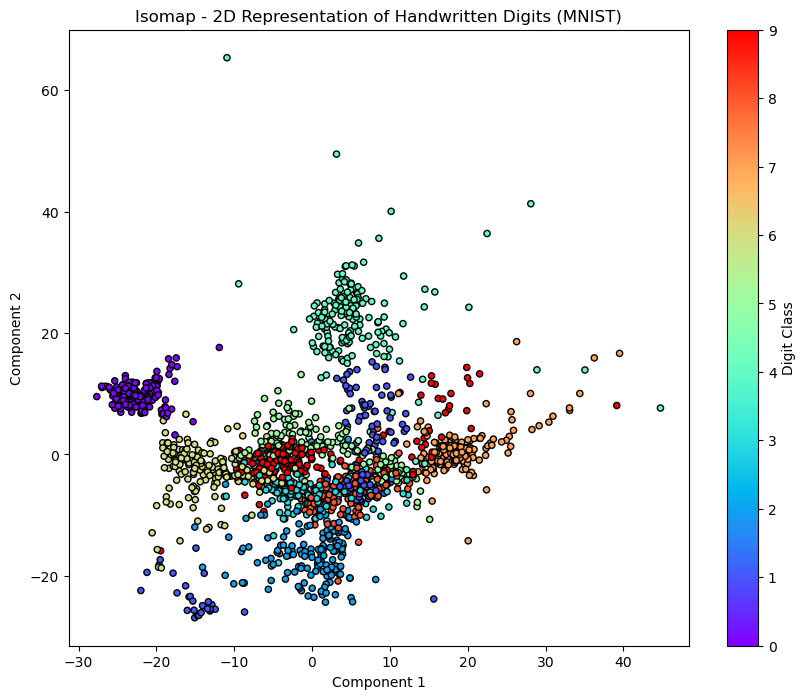

In [26]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='rainbow', edgecolors='k', s=20)
plt.title('Isomap - 2D Representation of Handwritten Digits (MNIST)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, ticks=np.arange(10), label='Digit Class')

plt.show() #x and y are random combinations of pixels (we are interested in the colour)


## Part 2: Supervised learning

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [28]:
#Perform the split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.8)

In [29]:
#Create and train the logistic regression model
modelLR = LogisticRegression(solver='sag')
modelLR.fit(Xtrain, ytrain)

/home/morgan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

In [30]:
#Compute the accuracy on the test set
ypred = modelLR.predict(Xtest)
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy of Logistic Regression on original data: {accuracy:.2f}')

Accuracy of Logistic Regression on original data: 0.94


In [31]:
#Print the confusion matrix
cm = confusion_matrix(ytest, ypred)
print("Confusion Matrix:")
pprint.pp(cm)

Confusion Matrix:
array([[138,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 142,   0,   0,   0,   0,   0,   0,   4,   1],
       [  0,   1, 142,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   4, 131,   0,   2,   0,   1,   9,   3],
       [ 13,   2,   0,   0, 122,   0,   2,   1,   1,   1],
       [  0,   1,   0,   0,   0, 138,   1,   0,   1,   4],
       [  1,   4,   0,   0,   0,   0, 145,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0,   0, 134,   2,   5],
       [  0,   5,   0,   0,   0,   2,   1,   2, 122,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   4, 143]])
